In [1]:
import os
os.environ['PATH'] = r'H:\Thesis\gifsicle-1.95-win64;' + os.environ['PATH'] 

import random
import torch
from docs.plots import * 
import numpy as np
from globals import COLORS

gpu = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def set_global_seed(seed: int):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)

  # If using CUDA
  if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def random_pc_vector(dim):
  while True:
    x = (2 * torch.rand(dim)) - 1  # random in (-1, 1)
    if torch.norm(x) < 1:
      return x
    
set_global_seed(42)

[poincare]
(distance)
(distance2plane)
(gyrovector_parallel_transport)
(mobius_add)
(Mobius Matvec)
(mobius_sigmoid_apply)
parallel_transport

[product]
(torus_embedding)


multiple 'tvtk.toolkits' plugins found for toolkit 'qt': tvtk.pyface.ui.qt4.init, tvtk.pyface.ui.qt4.init



[stereographic]
(distance)
(distance2plane)
(euclidean_grid)
(geodesic_grid)
(midpoint)
(mobius_add)
(mobius_matvec)
(orthogonal_sigmoid_apply)
(orthogonal_projection)
(orthogonal_projection_pub)
parallel_transport



 95%|█████████▍| 175/185 [12:12<00:41,  4.19s/it]


KeyboardInterrupt: 

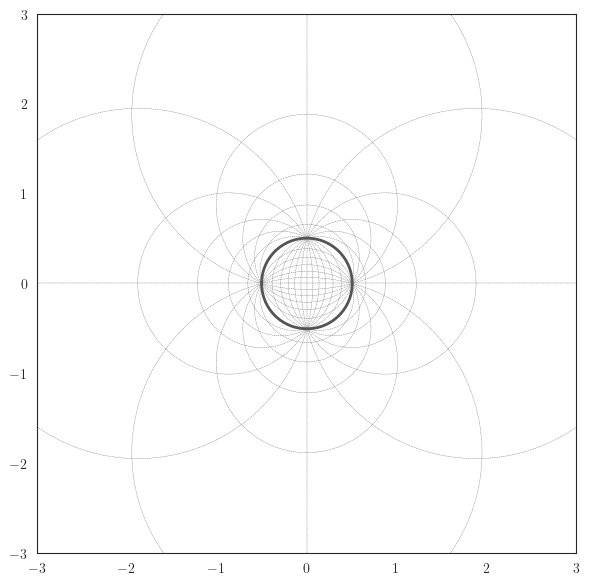

In [2]:
x   = random_pc_vector(2)
y   = random_pc_vector(2)
v1  = torch.rand(2)/5
v2  = torch.rand(2)/5
M   = torch.tensor([[-1, -1.5], [0.2, 0.5]])

# POINCARE

#poincare.distance.show(x,device)
#poincare.distance2plane.show(x,v1,device)
#poincare.distance2plane.show(x,v1,device)
#poincare.gyrovector_parallel_transport.show(x,y,device)
#poincare.mobius_add.show(x,y,device)
#poincare.mobius_matvec.show(M,x,device)
#poincare.mobius_sigmoid_apply.show(x,device)
#poincare.parallel_transport.show(x,y,v1,v2,device)

# PRODUCT GEOMETRY

#screenshots = product.torus_embedding.show(device)

# K-STEREOGRAPHIC MODEL

stereographic.distance.show(x,device)

In [ ]:
import imageio
imageio.mimsave(f'training.gif', screenshots, duration=1/24)

In [ ]:
import matplotlib.pyplot as plt

# Assuming bht_points is already defined
x_vals = [coord[0] for coord in bht_points.values()]
y_vals = [coord[1] for coord in bht_points.values()]

plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, c=COLORS.grey, s=10)


plt.gca().set_aspect("equal")  # for square geometry
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.grid(True)
plt.title("BHT Points")
plt.tight_layout()
plt.show()

In [ ]:
import pyopencl as cl

platforms = cl.get_platforms()
for platform in platforms:
  print(f"Platform: {platform.name}")
  for device in platform.get_devices():
    print(f"  Device: {device.name}")
    print(f"    Type: {cl.device_type.to_string(device.type)}")
    print(f"    Max compute units: {device.max_compute_units}")
    print(f"    Global memory: {device.global_mem_size / (1024 ** 3):.2f} GB")
    print(f"    Max clock freq: {device.max_clock_frequency} MHz")
    print(f"    Max allocable memory: {device.max_mem_alloc_size / (1024 ** 3):.2f} GB")
